<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
%tensorflow_version 1.x

# imports tensorflow library
import tensorflow as tf

print(tf.test.gpu_device_name())

# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# initiaizes two constant variables
var1 = tf.constant([1,2,3,4])
var2 = tf.constant([5,6,7,8])

# multiplies variables var1 and var2 
result = tf.multiply(var1, var2)

# prints result
print(result)

/device:GPU:0
Tensor("Mul_4:0", shape=(4,), dtype=int32)


In [ ]:
# unzips neccessarry zip files in Drive
# only needs to be run once for your Drive
#!unzip -uq "/content/drive/My Drive/BelgiumTSC_Training" -d "/content/drive/My Drive/TrafficSigns/Training"
#!unzip -uq "/content/drive/My Drive/BelgiumTSC_Testing" -d "/content/drive/My Drive/TrafficSigns/Testing"

In [4]:
import os
from skimage import io

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))

        print("Done!")
        
    return images, labels

ROOT_PATH = "/content/drive/MyDrive"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing/Testing")

images, labels = load_data(train_data_directory)



In [5]:
import numpy as np

images_array = np.array(images)

# Print the `images` dimensions
print(images_array.ndim)

# Print the number of `images`'s elements
print(images_array.size)

# Print the first instance of `images`
print(images_array[0])

1
4575
[[[103 115 108]
  [ 97 110 104]
  [ 93 106  99]
  ...
  [ 81  44  46]
  [ 97  51  53]
  [ 88  51  49]]

 [[103 115 108]
  [ 99 112 106]
  [ 95 108 102]
  ...
  [115  64  55]
  [140  81  73]
  [126  81  67]]

 [[104 117 109]
  [100 114 107]
  [ 96 109 104]
  ...
  [157 103  86]
  [185 134 117]
  [180 146 124]]

 ...

 [[110  92  77]
  [107  91  76]
  [105  90  75]
  ...
  [ 68  26  22]
  [ 68  26  21]
  [ 68  26  21]]

 [[119 101  84]
  [119 102  86]
  [118 103  87]
  ...
  [ 68  26  22]
  [ 68  26  21]
  [ 68  26  21]]

 [[118 103  87]
  [119 105  90]
  [118 106  91]
  ...
  [ 68  26  22]
  [ 68  26  21]
  [ 67  26  21]]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
labels_array= np.array(labels)

# Print the `labels` dimensions
print(labels_array.ndim)

# Print the number of `labels`'s elements
print(labels_array.size)

# Count the number of labels
print(len(set(labels_array)))

1
4575
62


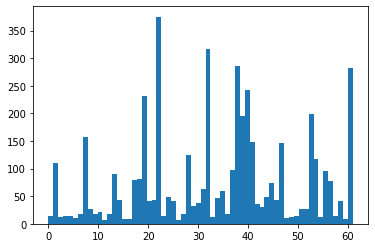

In [7]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

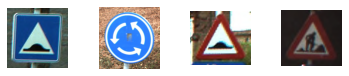

In [8]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

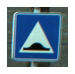

shape: (127, 129, 3), min: 0, max: 255


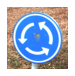

shape: (372, 367, 3), min: 17, max: 255


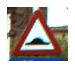

shape: (74, 83, 3), min: 0, max: 255


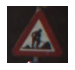

shape: (79, 85, 3), min: 6, max: 255


In [9]:
# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

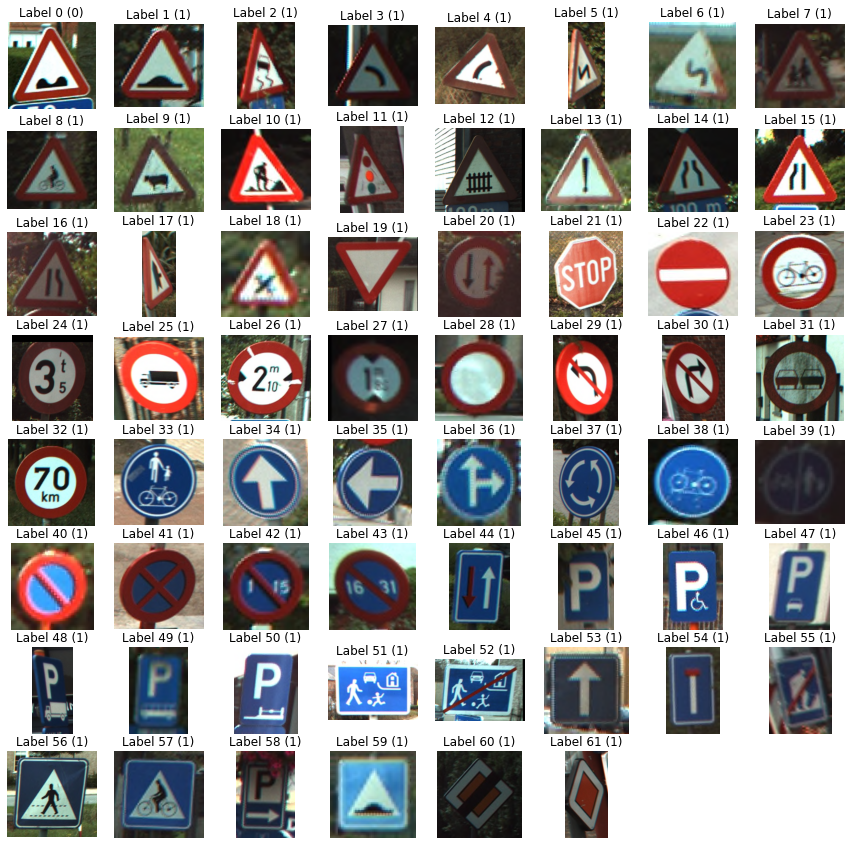

In [10]:
# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, np.count_nonzero(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [11]:
from skimage import transform

# Resize images
images32 = [transform.resize(image, (28, 28)) for image in images]
images32 = np.array(images32)

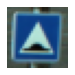

shape: (28, 28, 3), min: 0.02024559823929577, max: 0.907439225690276


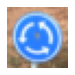

shape: (28, 28, 3), min: 0.1568627450980392, max: 0.9921568627450981


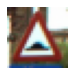

shape: (28, 28, 3), min: 0.052065826330532326, max: 0.996078431372549


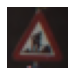

shape: (28, 28, 3), min: 0.08200280112044822, max: 0.5665878851540612


In [12]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images32[traffic_signs[i]].shape, 
                                                  images32[traffic_signs[i]].min(), 
                                                  images32[traffic_signs[i]].max()))

In [13]:
from skimage.color import rgb2gray

images32 = rgb2gray(np.array(images32))

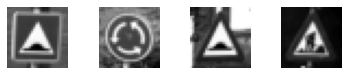

(4575, 28, 28)


In [14]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images32.shape)

In [31]:
# Import `tensorflow` 
import tensorflow as tf 

# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))



Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [32]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images32, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

In [34]:
import random

sample_indexes = random.sample(range(len(images32)), 10)
sample_images = [images32[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

[32, 17, 29, 7, 9, 24, 19, 61, 14, 32]
[32 17 40  7 18 61 19 61 14 32]


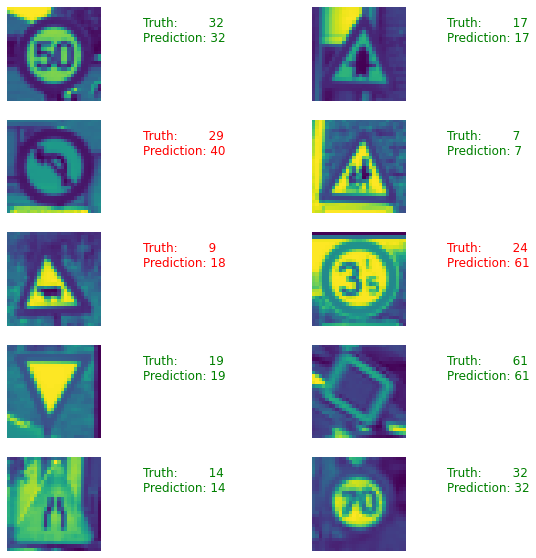

In [35]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [40]:
# Load the test data
#test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.636


In [41]:
sess.close()